## Retail Sales EDA
## -Parth Gupta


## Import Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading and Cleaning

In [6]:
#Load the dataset
data = pd.read_csv("retail_sales_dataset.csv")

In [12]:
data

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [13]:
#Removing Duplicate Values
data=data.drop_duplicates()
data

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [16]:
#Checking for null values 
data.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [18]:
#Changing datatypes
data.dtypes

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

In [20]:
data['Total Amount'] = data['Total Amount'].astype('float')
data["Date"] = pd.to_datetime(data["Date"])
data.dtypes

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount               float64
dtype: object

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 70.4+ KB


## Descriptive statistics

In [27]:
#Mean
data['Total Amount'].mean()

456.0

In [24]:
data.groupby('Product Category')['Total Amount'].mean().to_frame('Mean_Amount per Cat').reset_index().sort_values('Mean_Amount per Cat',ascending=False)

,Product Category,Mean_Amount per Cat
0,Beauty,467.475570
2,Electronics,458.786550
1,Clothing,443.247863


In [28]:
#Median
data['Total Amount'].median()

135.0

In [29]:
data.groupby('Product Category')['Total Amount'].median().to_frame('Median_Amount per Cat').reset_index().sort_values('Median_Amount per Cat',ascending=False)

,Product Category,Median_Amount per Cat
2,Electronics,150.0
0,Beauty,120.0
1,Clothing,120.0


In [31]:
#Mode
data.groupby('Product Category')['Total Amount'].value_counts().sort_values(ascending = False)

Product Category  Total Amount
Electronics       50.0            49
Clothing          50.0            39
                  100.0           37
Electronics       100.0           36
Beauty            100.0           35
                  50.0            27
Clothing          900.0           23
Electronics       30.0            22
                  300.0           22
Clothing          200.0           21
                  25.0            21
Electronics       900.0           21
Beauty            1500.0          21
                  200.0           21
Electronics       200.0           20
                  1200.0          20
Beauty            1000.0          20
Clothing          500.0           20
                  1200.0          20
Electronics       2000.0          19
Beauty            75.0            19
Clothing          120.0           19
Beauty            900.0           18
                  25.0            18
Electronics       500.0           17
                  1000.0          17
Clothin

In [32]:
#Standard Deviation
data['Total Amount'].std()

559.997631555123

In [33]:
data.groupby('Product Category')['Total Amount'].std().to_frame('StdOfSales').reset_index().sort_values('StdOfSales',ascending= False)

,Product Category,StdOfSales
2,Electronics,567.540150
0,Beauty,563.612788
1,Clothing,550.695917


## Time Series Analysis

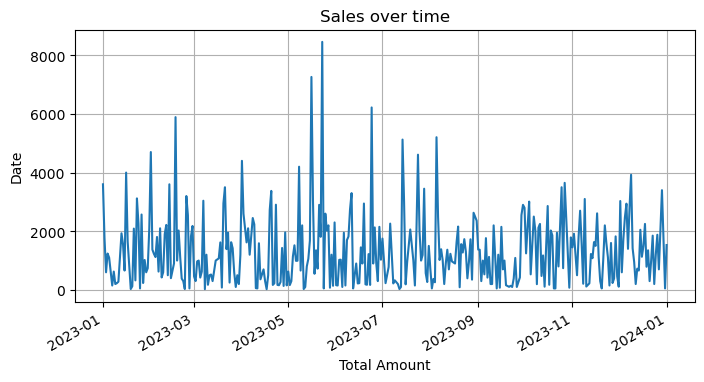

In [45]:
#Sales over time
plt.figure(figsize=(8,4))
data.groupby('Date')['Total Amount'].sum().plot()
plt.title('Sales over time')
plt.xlabel('Total Amount')
plt.ylabel('Date')
plt.grid(True)
plt.show()

## Customer and Product Analysis

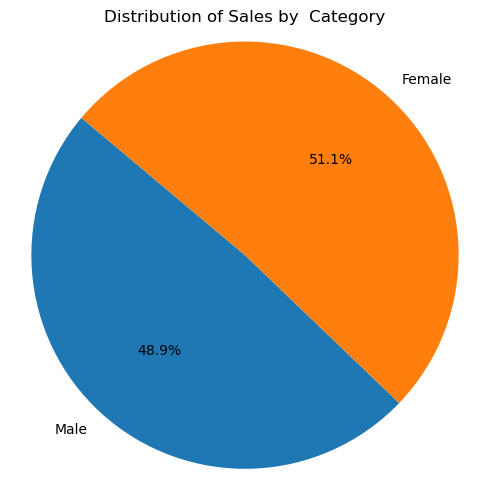

In [54]:
#Distribution of sales by gender
total_sales_by_category = data.groupby('Gender')['Total Amount'].sum().sort_values()
plt.figure(figsize=(5, 5))
plt.pie(total_sales_by_category, labels=total_sales_by_category.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sales by Gender')
plt.axis('equal') 
plt.tight_layout()
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


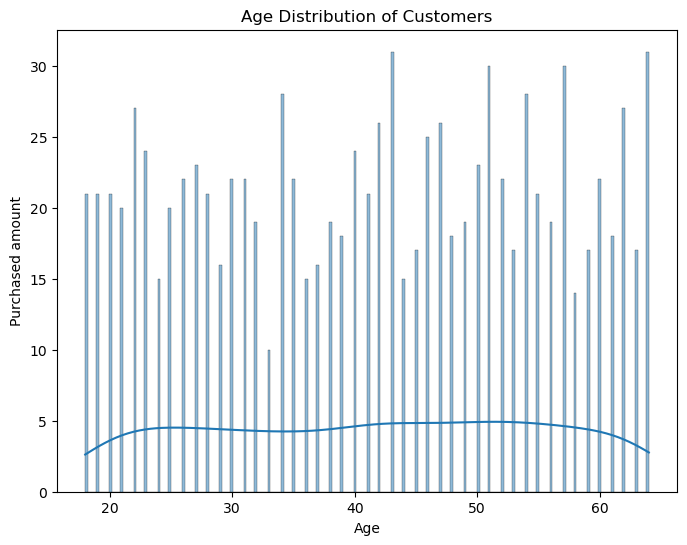

In [56]:
#Distribution of age
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=210, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Purchased amount')
plt.show()

## Visualization

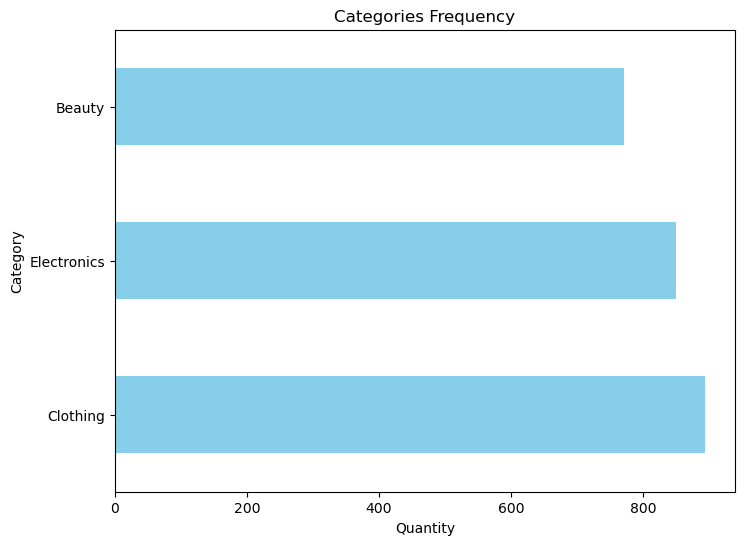

In [66]:
#Bar plot for Category based on Quantity
top_products = data.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)
plt.figure(figsize =(8,6))
top_products.plot(kind='barh',color='skyblue')
plt.xlabel('Quantity')
plt.ylabel('Category')
plt.title('Categories Frequency')
plt.show() 

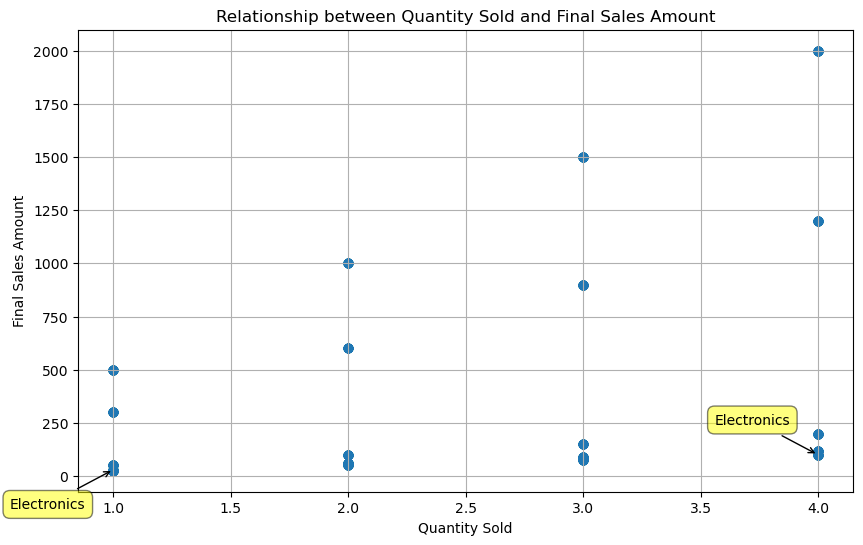

In [71]:
#Scatter plot for relation between Quantity and Total Amount
plt.figure(figsize=(10, 6))
plt.scatter(data['Quantity'], data['Total Amount'], alpha=0.5)

# Find extreme points
max_quantity_index = data['Quantity'].idxmax()
min_quantity_index = data['Quantity'].idxmin()

# Annotate extreme points with drug names
plt.annotate(data.loc[max_quantity_index, 'Product Category'],
             (data.loc[max_quantity_index, 'Quantity'], data.loc[max_quantity_index, 'Total Amount']),
             xytext=(-20, 20), textcoords='offset points', ha='right', va='bottom',
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
plt.annotate(data.loc[min_quantity_index, 'Product Category'],
             (data.loc[min_quantity_index, 'Quantity'], data.loc[min_quantity_index, 'Total Amount']),
             xytext=(-20, -20), textcoords='offset points', ha='right', va='top',
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.title('Relationship between Quantity and Final Sales Amount')
plt.xlabel('Quantity ')
plt.ylabel('Final Sales Amount')
plt.grid(True)
plt.show()

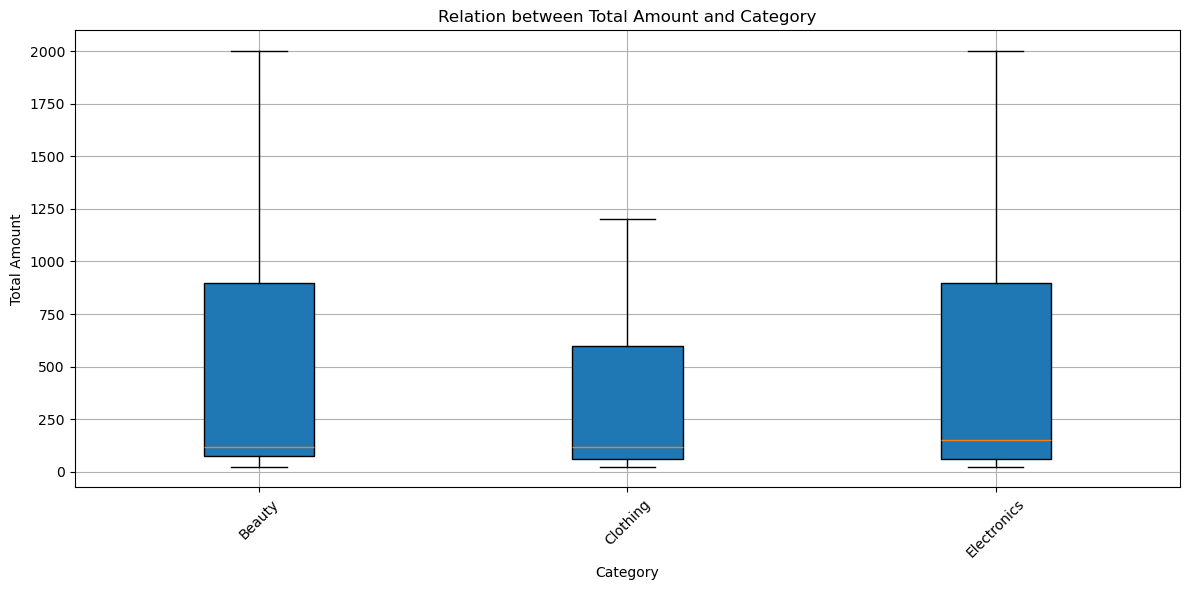

In [74]:
grouped_data = data.groupby('Product Category')['Total Amount'].apply(list)

# Create a list of final sales amounts for each drug category
sales_by_category = [grouped_data[category] for category in grouped_data.index]
plt.figure(figsize=(12, 6))
plt.boxplot(sales_by_category, labels=grouped_data.index, patch_artist=True, showfliers=False)
plt.title('Relation between Total Amount and Category')
plt.xlabel('Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

(25.0, 2200.0)

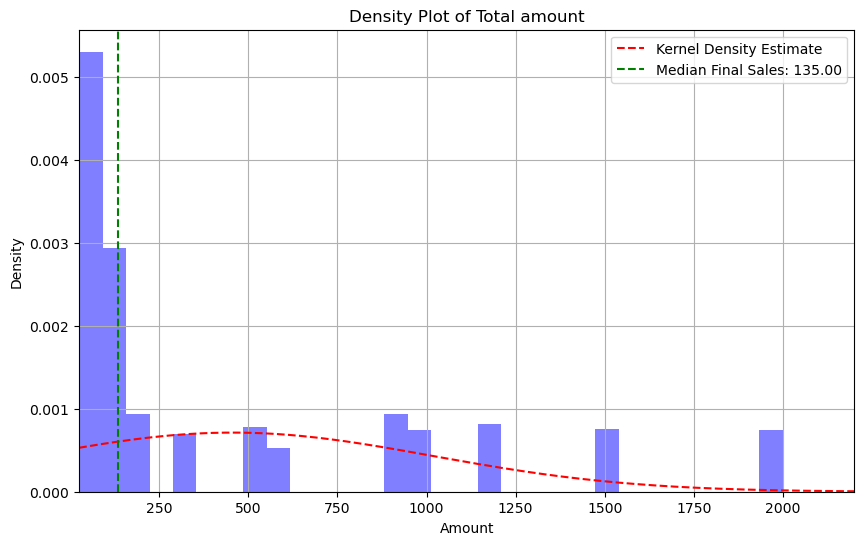

In [80]:
#Density PLot for Total Amount
median_final_sales = data['Total Amount'].median()

# Create the density plot
plt.figure(figsize=(10, 6))
plt.hist(data['Total Amount'], bins=30, density=True, alpha=0.5, color='blue')

# Create kernel density estimate
density = np.linspace(data['Total Amount'].min(), 4000, 1000)  # Adjusted range for x-axis
kde = (1 / (data['Total Amount'].std() * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((density - data['Total Amount'].mean()) / data['Total Amount'].std())**2)
plt.plot(density, kde, color='red', linestyle='--', label='Kernel Density Estimate')

plt.axvline(median_final_sales, color='green', linestyle='--', label=f'Median Final Sales: {median_final_sales:.2f}')
plt.title('Density Plot of Total amount')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.xlim(data['Total Amount'].min(), 2200)

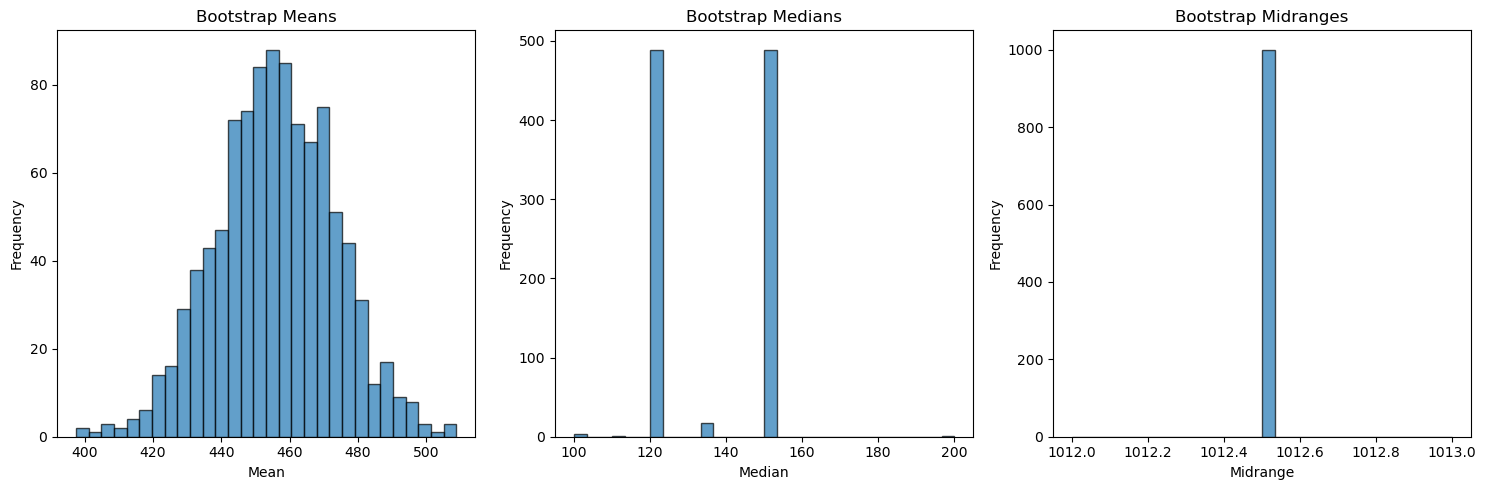

In [81]:
#Bootstrap Plot for Total Amount
num_samples = 1000
def midrange(arr):
    return (np.max(arr) + np.min(arr)) / 2

# Generate bootstrap samples and compute mean, median, and midrange for each sample
bootstrap_means = []
bootstrap_medians = []
bootstrap_midranges = []

for _ in range(num_samples):
    sample = np.random.choice(data['Total Amount'], size=len(data), replace=True)
    bootstrap_means.append(np.mean(sample))
    bootstrap_medians.append(np.median(sample))
    bootstrap_midranges.append(midrange(sample))

# Plot histograms of bootstrap means, medians, and midranges
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(bootstrap_means, bins=30, edgecolor='k', alpha=0.7)
plt.title('Bootstrap Means')
plt.xlabel('Mean')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(bootstrap_medians, bins=30, edgecolor='k', alpha=0.7)
plt.title('Bootstrap Medians')
plt.xlabel('Median')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(bootstrap_midranges, bins=30, edgecolor='k', alpha=0.7)
plt.title('Bootstrap Midranges')
plt.xlabel('Midrange')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

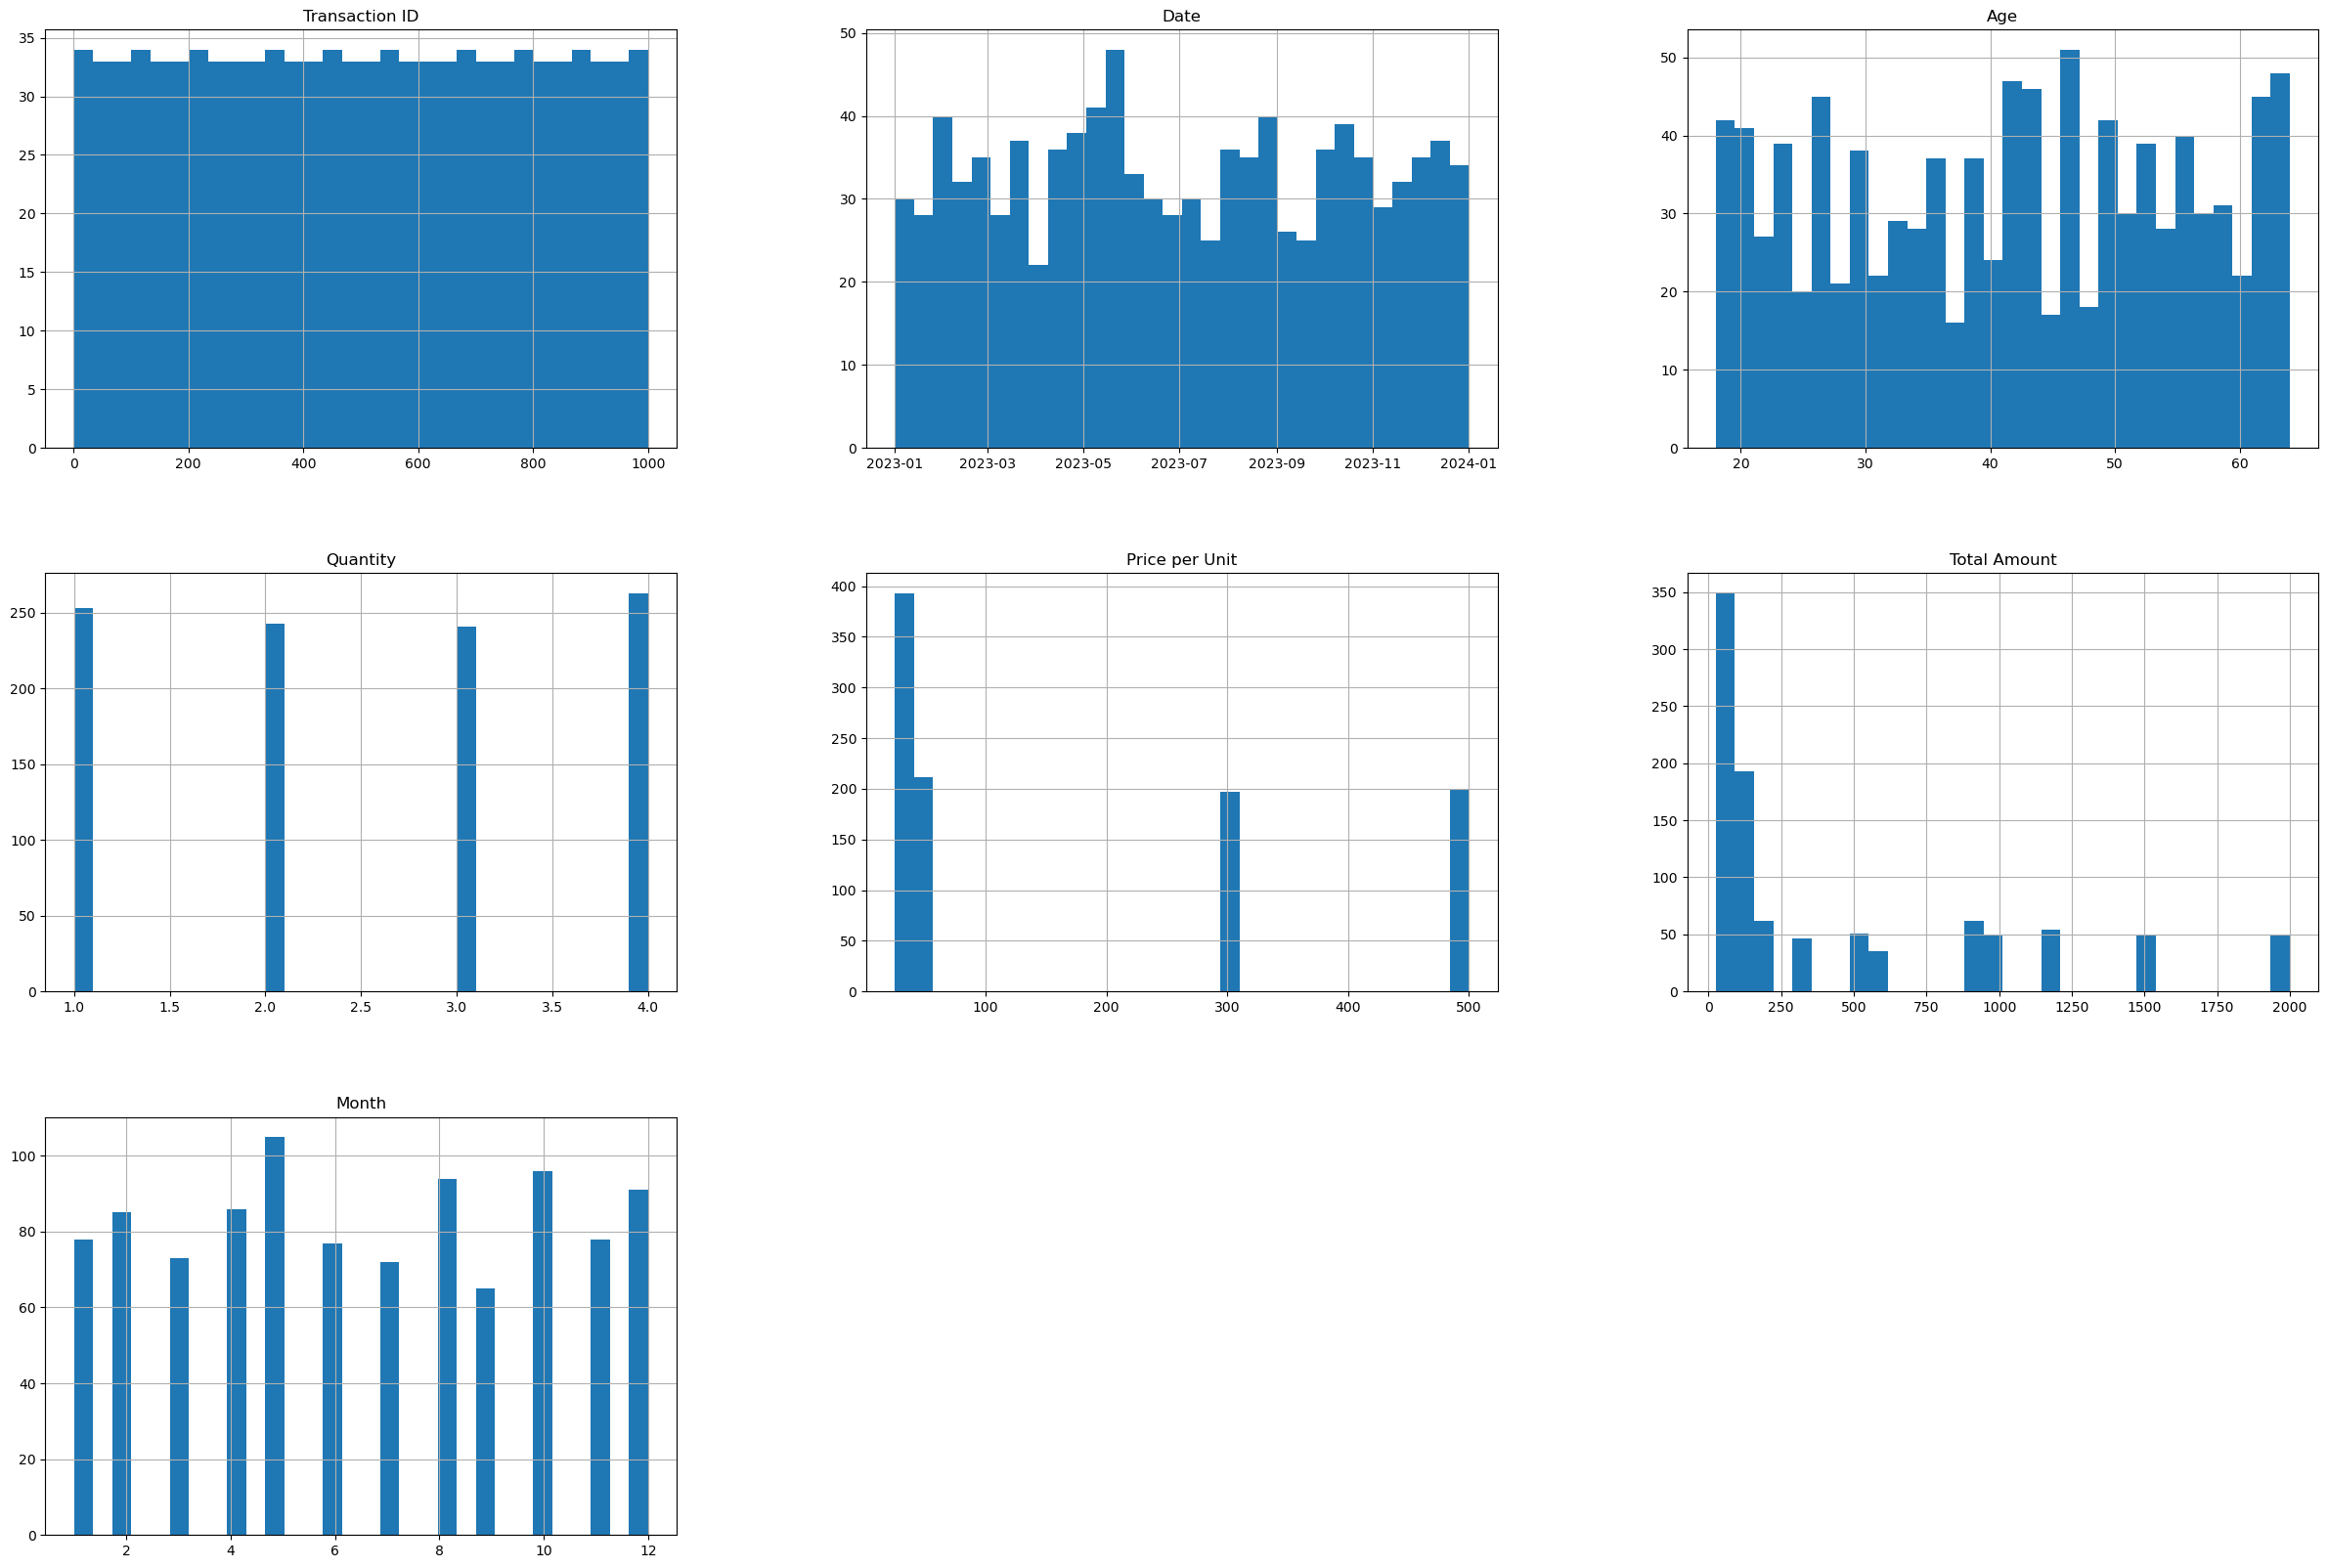

In [82]:
#Histogram of each column
data.hist( bins = 30, figsize = (30,20))
plt.show()

## Recommendations

1) ##### Customer Segmentation: Distribute customers based on gender,demographics,age and provide targeted products based on analysis to them.
2) ##### Price Sensitivity :Increase/Decrease the price of certain products based on the performance of the product.
3) ##### Best-Selling Products : See the best selling product and category and increase the price based on its performance
4) ##### Promotion : Provide advertisements based on geography and age so that the product gets pushed towards the person in need.